Problem 1: We saw in class how Taylor series/roundoff errors fight against each other when deciding how big a step size to use when calculating numerical derivatives. If we allow ourselves to evaluate our function f at four points (x±δ and x ± 2δ),

a) What should our estimate of the first derivative at x be? Rather than doing a complicated fit, I suggest thinking about how to combine the derivative from x ± δ with the derivative from x ± 2δ to cancel the next term in the Taylor series.

In [1]:
from IPython.display import Latex
Latex(r"""From Taylor expansion:\begin{eqnarray}
f(x+\delta)= f(x) + \delta f'(x) + \frac{\delta^2}{2} f''(x) + \frac{\delta^{3}}{3!} f'''(x) + \frac{\delta^{4}}{4!} f'''(x) + \mathcal{O}(\delta^{5}) \\
f(x-\delta)= f(x) - \delta f'(x) + \frac{\delta^2}{2} f''(x) - \frac{\delta^{3}}{3!} f'''(x) + \frac{\delta^{4}}{4!} f'''(x) - \mathcal{O}(\delta^{5}) \\
f(x+\delta)-f(x-\delta)= 2\delta f'(x) + \frac{2\delta^{3}}{3!} f'''(x) + \mathcal{O}(\delta^{5}) \\
f(x+\delta)-f(x-\delta)= 2\delta f'(x) + \frac{\delta^{3}}{3} f'''(x) + \mathcal{O}(\delta^{5}) \\
\frac{f(x+\delta)-f(x-\delta)}{2\delta}= f'(x) + \frac{\delta^2}{6} f'''(x) + \mathcal{O}(\delta^{4}) \\
\end{eqnarray}

Also from Taylor expansion but this time with 2
$\delta$: 
\begin{eqnarray}
f(x+2\delta)-f(x-2\delta)= 4\delta f'(x) + \frac{8\delta^{3}}{3} f'''(x) + \mathcal{O}(\delta^{5}) \\
\frac{f(x+2\delta)-f(x-2\delta)}{2\delta}= 2f'(x) + \frac{8\delta^2}{6}f'''(x) + \mathcal{O}(\delta^4) \\
\end{eqnarray}
Now, we combine the two:
\begin{eqnarray}
\frac{8(f(x+\delta)-f(x-\delta))-f(x+2\delta)+f(x-2\delta)}{2\delta}= 6f'(x) + \mathcal{O}(\delta^{4})\\
\end{eqnarray}
Thus, the formula is:
\begin{eqnarray}f'(x)=\frac{8(f(x+\delta)-f(x-\delta))-f(x+2\delta)+f(x-2\delta)}{12\delta}+ \mathcal{O}(\delta^4)
\end{eqnarray}
""")


<IPython.core.display.Latex object>

In [79]:
#In code 
import numpy as np
def firstderiv(x0,delta,fun):
    x=(x0-2*delta,x0-delta,x0+delta,x0+2*delta)
    y=fun(x)
    diff1= (y[2]-y[1])
    diff2= (y[3]-y[0])
    firstderiv= (8*diff1 -diff2)/(12*delta)
    return firstderiv
     
#Sanity Check  
fd=firstderiv(1,0.0000001,np.exp)
print("We find that d(exp(x))/dx evaluated at 1 is:",fd)
print("Which corresponds to our expectation of",np.exp(1)) 
print("The error is",abs(np.exp(1)-fd))

We find that d(exp(x))/dx evaluated at 1 is: 2.718281828887707
Which corresponds to our expectation of 2.718281828459045
The error is 4.286619947890813e-10


b) Now that you have your operator for the derivative, what should δ be in terms of the machine precision and various properties of the function? 

In [27]:
from IPython.display import Latex
Latex(r"""To find the ideal delta, let's try to minimize our error:
\begin{eqnarray}diff=\frac{8(f(x+\delta)-f(x-\delta))-f(x+2\delta)+f(x-2\delta)}{12\delta}+ \mathcal{O}(\delta^4)\\
Error=diff-f'(x)\\
Error\approx\frac{f^{(5)}\delta^4}{4}+\frac{\epsilon_mf(x)}{2\delta}
\end{eqnarray}
Where the first term is the order of $\delta^4$ left from our expression of diff, and $\epsilon_m$ is machine precision.
By minimizing this expression, we obtain: 
\begin{eqnarray}
\frac{dError}{d\delta}=0 \\
0=f^{(5)}\delta^3-\frac{\epsilon_mf(x)}{\delta^2} \\
f^{(5)}\delta^3=\frac{\epsilon_mf(x)}{\delta^2} \\
\delta^5=\frac{\epsilon_mf(x)}{f^{(5)}} \\
\end{eqnarray}
So if we assume that $f(x)\approx f^{(5)}(x)$, then the ideal $\delta$ is $\epsilon_m^{1/5}$, or $10^{-16/5}$.
""")

<IPython.core.display.Latex object>

b) (continued) Show for f(x) = exp(x) and f(x) = exp(0.01x) that your estimate of the optimal δ is at least roughly correct.

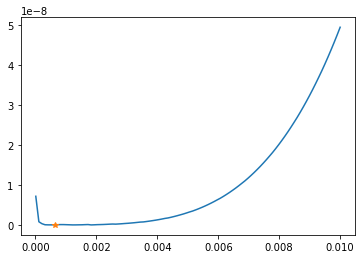

In [101]:
import numpy as np
from matplotlib import pyplot as plt
def firstderiv(x0,delta,fun):
    x=(x0-2*delta,x0-delta,x0+delta,x0+2*delta)
    y=fun(x)
    diff1= (y[2]-y[1])
    diff2= (y[3]-y[0])
    firstderiv= (8*diff1 -diff2)/(12*delta)
    return firstderiv
     
delta=np.linspace(10**(-5),10**(-2),100)
optimal_delta=(10**(-16/5))
error= abs(np.exp(5)-firstderiv(5,delta,np.exp))
optimal_error=abs(np.exp(5)-firstderiv(5,optimal_delta,np.exp))
plt.clf()
plt.plot(delta,error)
plt.plot((10**(-16/5)),optimal_error,"*")
plt.show()



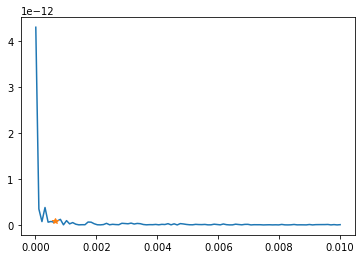

In [108]:
import numpy as np
from matplotlib import pyplot as plt
def firstderiv(x0,delta,fun):
    x=(x0-2*delta,x0-delta,x0+delta,x0+2*delta)
    y=fun(x)
    diff1= (y[2]-y[1])
    diff2= (y[3]-y[0])
    firstderiv= (8*diff1 -diff2)/(12*delta)
    return firstderiv

def e001(x):
    y=np.exp(np.asarray(x)*0.01)
    return y

delta=np.linspace(10**(-5),10**(-2),100)
optimal_delta=(10**(-16/5))

exp001_A=0.01*np.exp(0.01) #analytical derivative
exp001_B=firstderiv(1,delta,e001) #using our algorithm and optimal delta
error2= abs(exp001_A-exp001_B)
optimal_error2=abs(0.01*np.exp(0.01)-firstderiv(1,optimal_delta,e001))
plt.clf()
plt.plot(delta,error2)
plt.plot(optimal_delta,optimal_error2,'*')
plt.show()


Problem 2:
Write a routine that will take an arbitrary voltage and interpolate to return a temperature.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate

def temperature(V):
    data = np.loadtxt("/Users/jmlascar/Lascar512")
    data = np.transpose(data)
    temperature, voltage = data[0], data[1]
    ind=np.argsort(voltage)
    temperature=temperature[ind]
    voltage=voltage[ind]
    spln=interpolate.splrep(voltage,temperature)
    yy=interpolate.splev(V,spln)
    return yy

V=1.4
T=temperature(V)
if (V<9.0681e-02) or (V>1.64429):
    print("A voltage of",V,"V is outside the bounds of this interpolation.")
else:
    print("For a voltage of ",V,"V the temperature is",T,"K.")

#estimate error 
#difference between linear fit and interpolation 

#just to get a nice plot:
data = np.loadtxt("/Users/jmlascar/Lascar512")
data = np.transpose(data)
temp, volt = data[0], data[1]
plt.clf()
plt.plot(volt, temp,"*")
plt.plot(volt,temperature(volt))
plt.show()

OSError: /Users/jmlascar/Lascar512 not found.